In [2]:
import pandas as pd
from IPython.display import Image
import requests
# import ast
import json
import time

511 API Notes:
- 60 requests per 3600 seconds (60 requests/hour, 1 per minute...)
- can get static or real-time data: 
  - Static transit data in General Transit Feed Specification (GTFS) and Open 511 SIRI/NeTEx API formats
  - Real-time transit data via Open 511 SIRI APIs and GTFS-Realtime

Relevant operators for Berkeley students:
- AC transit
- BART
- Caltrain (SF)
- Muni (SF)

Relevant routes for Berkeley students:
- Red: Berk --> Oakland --> SF | Berk --> Richmond
- Orange: Berk --> San Jose
Maybe relevant:
- Yellow/blue
Not relevant:
- Green

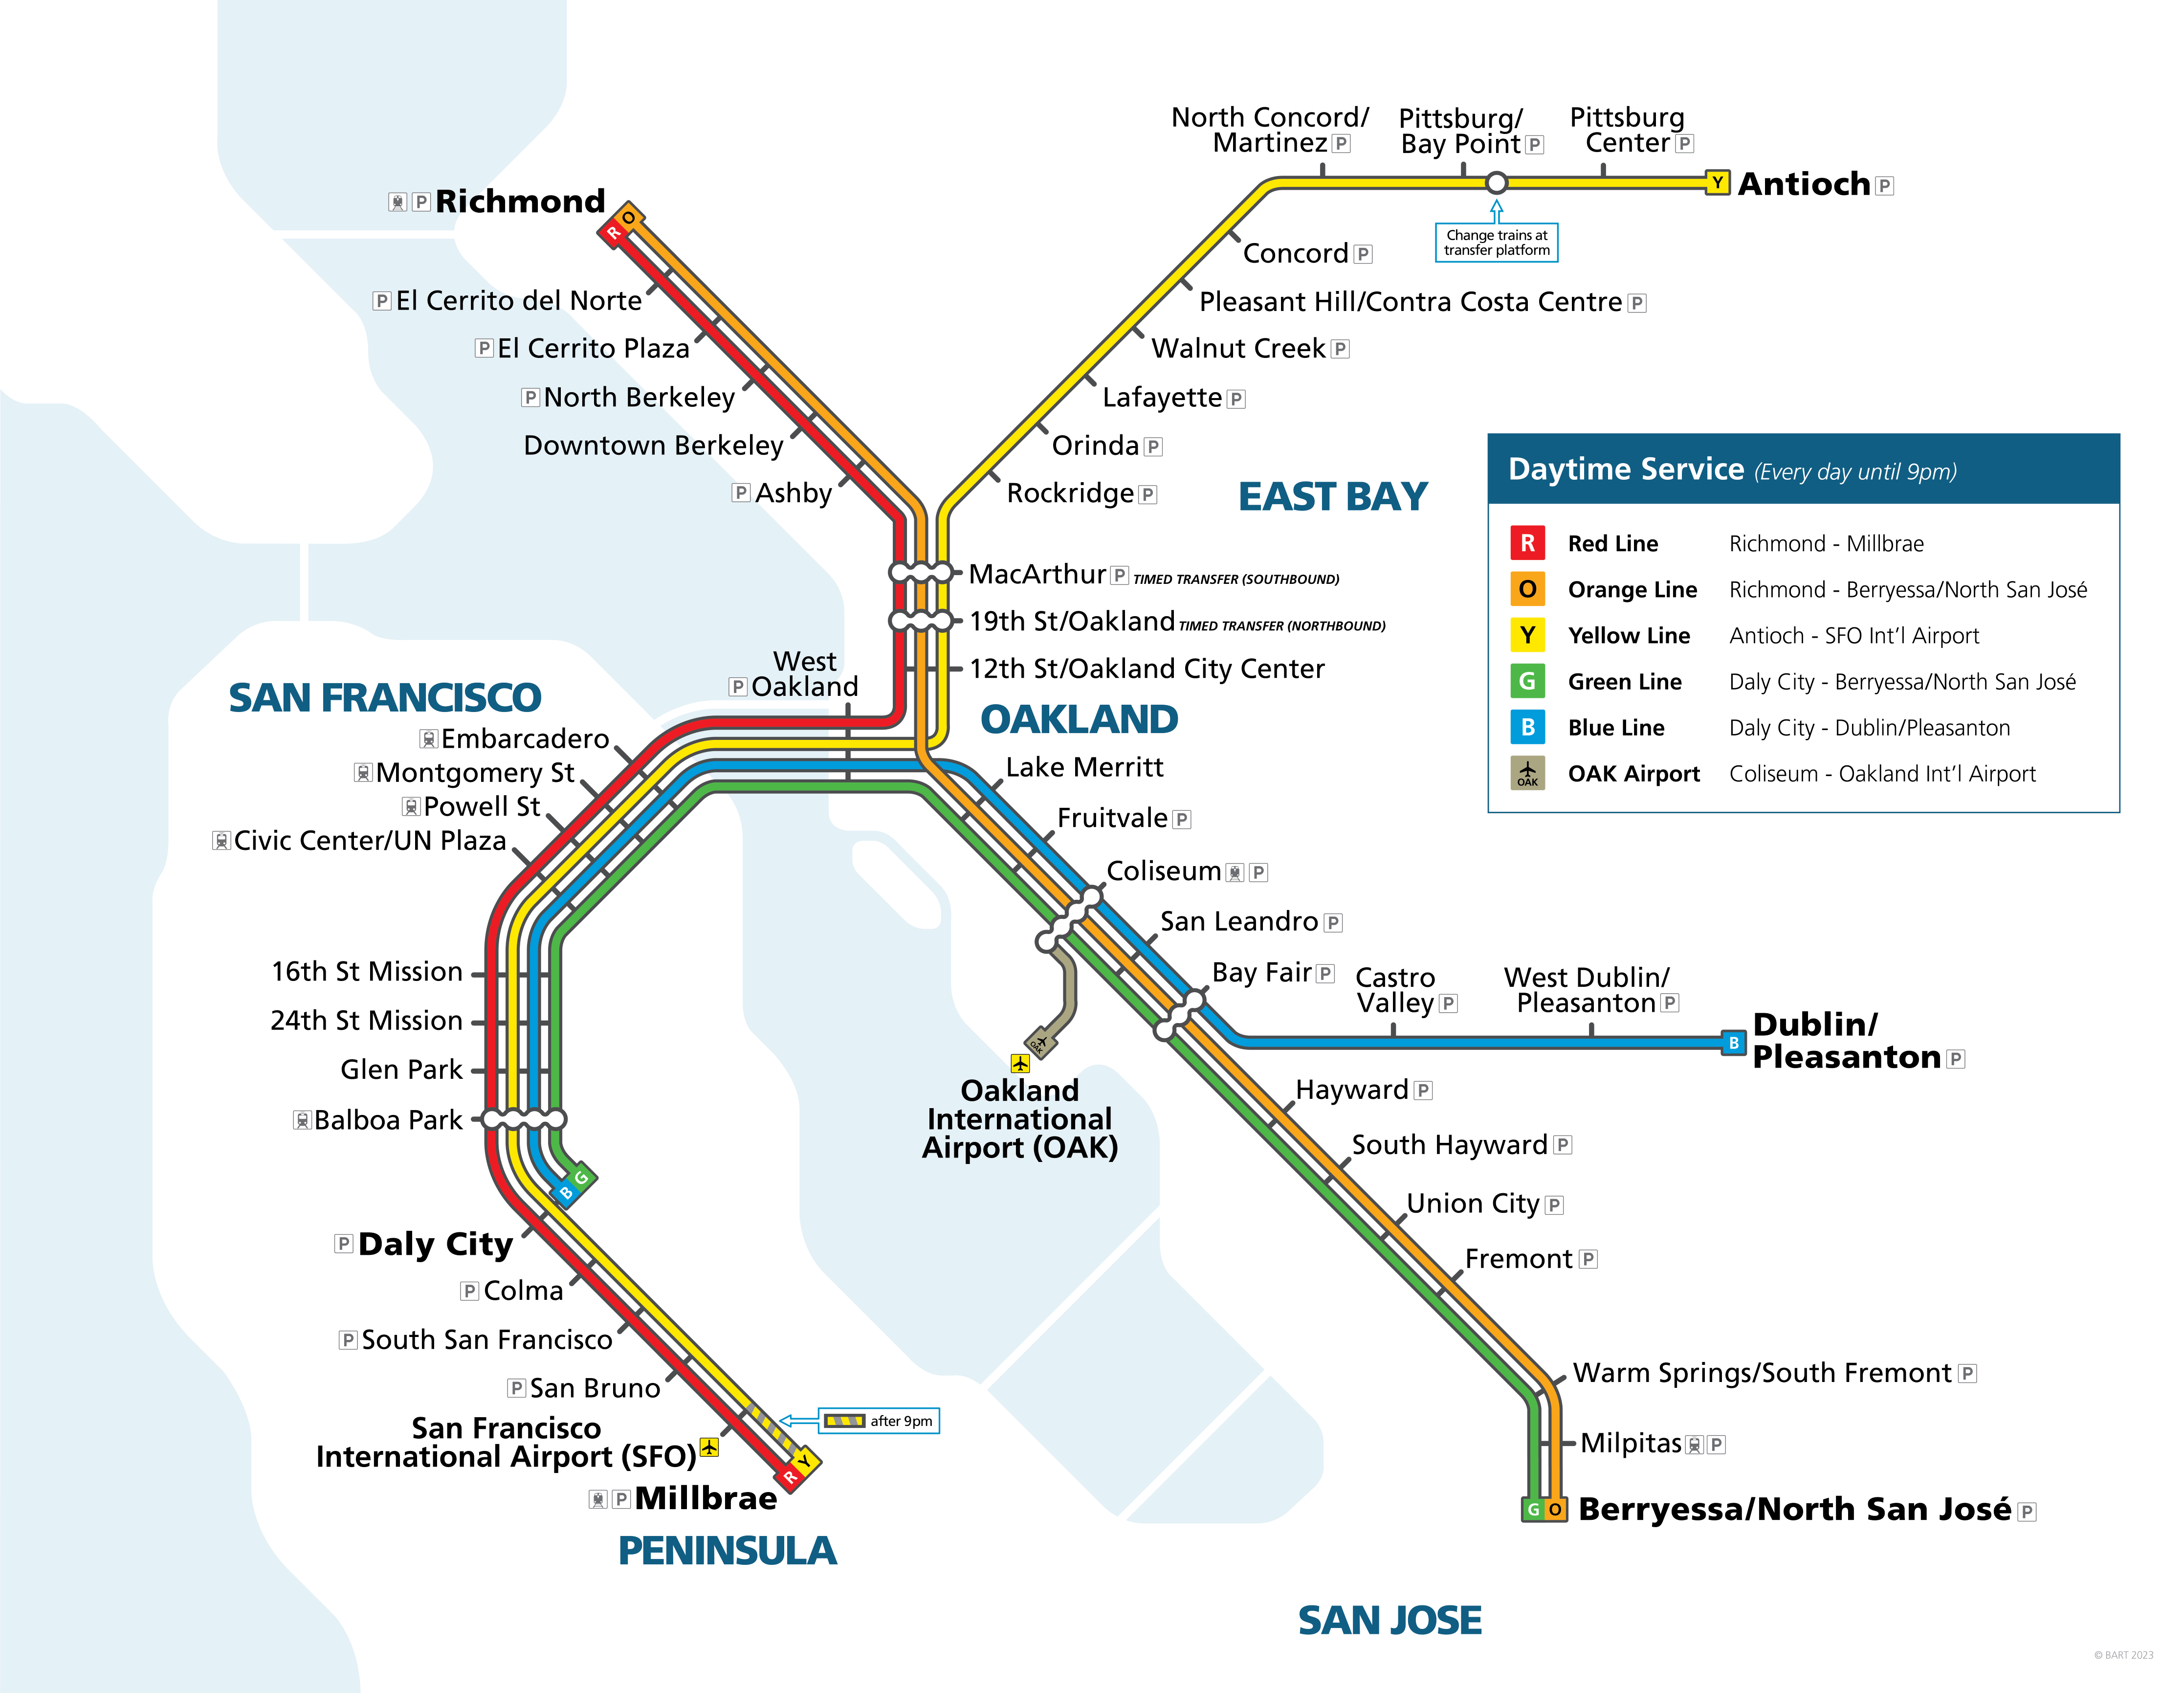

In [2]:
Image(filename='bart-system-map.png', width=800)

In [ ]:
# Ridership data... (from baypass site?)

In [3]:
API_KEY = '7478ab74-6d87-48e1-bfae-4ba7b91f3c5a'
API_TIMEOUT = 60
API_KEY

'7478ab74-6d87-48e1-bfae-4ba7b91f3c5a'

In [4]:
def get_request(endpoint,*endpoint_params):
    request_URL = endpoint.format(*endpoint_params)
    # print(request_URL)
    res = requests.get(request_URL)
    res_content = res.content.decode('utf-8-sig') # need to convert from bytes to string
    res_json = json.loads(res_content)
    return res_json

### Requesting Operators

In [8]:
operator_endpoint="http://api.511.org/transit/operators?api_key={}"
operator_endpoint

'http://api.511.org/transit/operators?api_key={}'

In [26]:
# Get operators
operator_json = get_request(operator_endpoint, API_KEY)
operator_json

[{'Id': '5E',
  'Name': '511 Emergency',
  'ShortName': '511 Emergency',
  'SiriOperatorRef': None,
  'TimeZone': 'America/Vancouver',
  'DefaultLanguage': 'en',
  'ContactTelephoneNumber': None,
  'WebSite': None,
  'PrimaryMode': 'other',
  'PrivateCode': '5E',
  'Monitored': False,
  'OtherModes': ''},
 {'Id': '5F',
  'Name': '511 Flap Sign',
  'ShortName': '511 Flap Sign',
  'SiriOperatorRef': None,
  'TimeZone': 'America/Vancouver',
  'DefaultLanguage': 'en',
  'ContactTelephoneNumber': None,
  'WebSite': None,
  'PrimaryMode': 'other',
  'PrivateCode': '5F',
  'Monitored': False,
  'OtherModes': ''},
 {'Id': '5O',
  'Name': '511 Operations',
  'ShortName': '511 Emergency',
  'SiriOperatorRef': None,
  'TimeZone': 'America/Vancouver',
  'DefaultLanguage': 'en',
  'ContactTelephoneNumber': None,
  'WebSite': None,
  'PrimaryMode': 'other',
  'PrivateCode': '5O',
  'Monitored': False,
  'OtherModes': ''},
 {'Id': '5S',
  'Name': '511 Staff',
  'ShortName': '511 Staff',
  'SiriOperat

In [63]:
# save all operators in json
operator_keys = list(operator_json[0].keys())
keys_to_remove = operator_keys[3:]
for item in operator_json:
    for key in keys_to_remove:
        item.pop(key, None)
file_path = 'operators.json'
with open(file_path, 'w') as json_file:
    json.dump(operator_json, json_file, indent=2)  # indent for pretty formatting (optional)

### Requesting Lines

In [ ]:
lines_endpoint = 'http://api.511.org/transit/lines?api_key={KEY}&operator_id={operatorID}'

In [81]:
# Get lines for relevant operators
line_dict = {}
op_id_dict = {}
for op in operator_short_list:
    op_id = op['Id']
    op_name = op['Name']
    print(op_name)
    lines_json = get_request(lines_endpoint, 'KEY=API_KEY, operatorID={opID}'.format(opID=op_id))
    line_dict[op_name] = lines_json
    op_id_dict[op_name] = op_id
    time.sleep(API_TIMEOUT)
line_dict
# lines = requests.get(lines_endpoint)

{}

In [80]:
# save operator line data in json files
for operator, line in line_dict.items():
    print(operator, line)
    file_path = operator + '_lines.json'
    with open(file_path, 'w') as json_file:
        json.dump(line, json_file, indent=2)

AC TRANSIT [{'Id': '12', 'Name': 'MLK Jr. - Temescal - Grand', 'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00', 'TransportMode': 'bus', 'PublicCode': '12', 'SiriLineRef': '12', 'Monitored': True, 'OperatorRef': 'AC'}, {'Id': '232', 'Name': 'Mission - Decoto - NewPark', 'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00', 'TransportMode': 'bus', 'PublicCode': '232', 'SiriLineRef': '232', 'Monitored': True, 'OperatorRef': 'AC'}, {'Id': '33', 'Name': 'Piedmont - Harrison - Park Blvd.', 'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00', 'TransportMode': 'bus', 'PublicCode': '33', 'SiriLineRef': '33', 'Monitored': True, 'OperatorRef': 'AC'}, {'Id': '671', 'Name': 'De Anza - Crespi - Fairmede', 'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00', 'TransportMode': 'bus', 'PublicCode': '671', 'SiriLineRef': '671', 'Monitored': True, 'OperatorRef': 'AC'}, {'Id': '96', 'Name': 'Alame

### Route patterns

In [12]:
with open('operators.json', 'r') as json_file:
    operator_json = json.load(json_file)
operator_short_list = [operator_json[i] for i in [4,7,8,28]]
operator_short_list

[{'Id': 'AC', 'Name': 'AC TRANSIT', 'ShortName': 'AC Transit'},
 {'Id': 'BA', 'Name': 'Bay Area Rapid Transit', 'ShortName': 'BART'},
 {'Id': 'CT', 'Name': 'Caltrain', 'ShortName': 'Caltrain'},
 {'Id': 'SF',
  'Name': 'San Francisco Municipal Transportation Agency',
  'ShortName': 'SF Muni'}]

In [13]:
route_pattern_endpoint = 'http://api.511.org/transit/patterns?api_key={}&operator_id={}&line_id={}'

In [115]:
# testing 51B
with open('AC TRANSIT_lines.json', 'r') as json_file:
    ACT_lines = json.load(json_file)
ACT_lines

[{'Id': '12',
  'Name': 'MLK Jr. - Temescal - Grand',
  'FromDate': '2023-12-03T00:00:00-08:00',
  'ToDate': '2024-03-02T23:59:00-08:00',
  'TransportMode': 'bus',
  'PublicCode': '12',
  'SiriLineRef': '12',
  'Monitored': True,
  'OperatorRef': 'AC'},
 {'Id': '232',
  'Name': 'Mission - Decoto - NewPark',
  'FromDate': '2023-12-03T00:00:00-08:00',
  'ToDate': '2024-03-02T23:59:00-08:00',
  'TransportMode': 'bus',
  'PublicCode': '232',
  'SiriLineRef': '232',
  'Monitored': True,
  'OperatorRef': 'AC'},
 {'Id': '33',
  'Name': 'Piedmont - Harrison - Park Blvd.',
  'FromDate': '2023-12-03T00:00:00-08:00',
  'ToDate': '2024-03-02T23:59:00-08:00',
  'TransportMode': 'bus',
  'PublicCode': '33',
  'SiriLineRef': '33',
  'Monitored': True,
  'OperatorRef': 'AC'},
 {'Id': '671',
  'Name': 'De Anza - Crespi - Fairmede',
  'FromDate': '2023-12-03T00:00:00-08:00',
  'ToDate': '2024-03-02T23:59:00-08:00',
  'TransportMode': 'bus',
  'PublicCode': '671',
  'SiriLineRef': '671',
  'Monitored': T

In [116]:
# testing on 51B --> works!
ACT_51B_json = get_request(route_pattern_endpoint, 'API_KEY', 'AC', '51B')

200


'{"directions":[{"DirectionId":"S","Name":"South"},{"DirectionId":"N","Name":"North"}],"journeyPatterns":[{"serviceJourneyPatternRef":"221182","LineRef":"51B","TripCount":117,"FromDate":"2023-12-03T00:00:00-08:00","ToDate":"2024-03-02T23:59:00-08:00","Name":"College Av \\u0026 Rockridge BART","DirectionRef":"S","DestinationDisplayView":{"FontText":"Rockridge BART"},"PointsInSequence":{"StopPointInJourneyPattern":[{"StopPointInJourneyPatternId":"15520759","Order":"2","ScheduledStopPointRef":"54477","Name":"University Av \\u0026 4th St","DestinationDisplayView":""},{"StopPointInJourneyPatternId":"15520760","Order":"3","ScheduledStopPointRef":"55548","Name":"University Av \\u0026 6th St","DestinationDisplayView":""},{"StopPointInJourneyPatternId":"15520761","Order":"4","ScheduledStopPointRef":"55855","Name":"University Av \\u0026 9th St","DestinationDisplayView":""},{"StopPointInJourneyPatternId":"15520763","Order":"6","ScheduledStopPointRef":"51617","Name":"University Av \\u0026 Bonar St

In [119]:
file_path = 'AC TRANSIT_51B_pattern.json'
with open(file_path, 'w') as json_file:
    json.dump(ACT_51B_json, json_file, indent=2)

In [ ]:
# wait till rate limit approved before running on all lines
with open('AC TRANSIT_lines.json', 'r') as json_file:
    ACT_lines = json.load(json_file)
# ACT_lines
# get AC Transit patterns
ACT_patterns_dict = {}
for line in ACT_lines:
    line_id = line['Id']
    print(line)
    ACT_patterns_dict[line] = get_request(route_pattern_endpoint, 'KEY=API_KEY, operatorID={opID}, lineID={lineID}'.format(opID = 'AC',lineID=line_id))
    time.sleep(API_TIMEOUT)
ACT_patterns_dict

In [ ]:
file_path = 'AC TRANSIT_patterns.json'
with open(file_path, 'w') as json_file:
    json.dump(ACT_patterns_dict, json_file, indent=2)

In [11]:
# wait till rate limit approved before running on all lines
with open('BART_lines.json', 'r') as json_file:
    BART_lines = json.load(json_file)
BART_lines

[{'Id': 'Yellow-S',
  'Name': 'Antioch to SFIA/Millbrae',
  'FromDate': '2024-01-15T00:00:00-08:00',
  'ToDate': '2024-08-11T23:59:00-08:00',
  'TransportMode': 'rail',
  'PublicCode': 'Yellow-S',
  'SiriLineRef': 'Yellow-S',
  'Monitored': True,
  'OperatorRef': 'BA'},
 {'Id': 'Orange-N',
  'Name': 'Berryessa/North San Jose to Richmond',
  'FromDate': '2024-01-15T00:00:00-08:00',
  'ToDate': '2024-08-11T23:59:00-08:00',
  'TransportMode': 'rail',
  'PublicCode': 'Orange-N',
  'SiriLineRef': 'Orange-N',
  'Monitored': True,
  'OperatorRef': 'BA'},
 {'Id': 'Orange-S',
  'Name': 'Richmond to Berryessa/North San Jose',
  'FromDate': '2024-01-15T00:00:00-08:00',
  'ToDate': '2024-08-11T23:59:00-08:00',
  'TransportMode': 'rail',
  'PublicCode': 'Orange-S',
  'SiriLineRef': 'Orange-S',
  'Monitored': True,
  'OperatorRef': 'BA'},
 {'Id': 'Green-S',
  'Name': 'Berryessa/North San Jose to Daly City',
  'FromDate': '2024-01-15T00:00:00-08:00',
  'ToDate': '2024-08-11T23:59:00-08:00',
  'Transp

In [29]:
# testing with Yellow line South --> works!
get_request(route_pattern_endpoint, API_KEY, 'BA', line_id)

{'directions': [{'DirectionId': 'S', 'Name': 'South'}],
 'journeyPatterns': [{'serviceJourneyPatternRef': '215687',
   'LineRef': 'Yellow-S',
   'TripCount': 201,
   'FromDate': '2024-01-15T00:00:00-08:00',
   'ToDate': '2024-08-11T23:59:00-08:00',
   'Name': 'San Francisco International Airport',
   'DirectionRef': 'S',
   'DestinationDisplayView': {'FontText': 'San Francisco International Airport'},
   'PointsInSequence': {'StopPointInJourneyPattern': [],
    'TimingPointInJourneyPattern': [{'TimingPointInJourneyPatternId': '15701174',
      'Order': '1',
      'ScheduledStopPointRef': 'ANTC',
      'Name': 'Antioch',
      'DestinationDisplayView': ''},
     {'TimingPointInJourneyPatternId': '15701175',
      'Order': '2',
      'ScheduledStopPointRef': 'PCTR',
      'Name': 'Pittsburg Center',
      'DestinationDisplayView': ''},
     {'TimingPointInJourneyPatternId': '15701176',
      'Order': '3',
      'ScheduledStopPointRef': 'PITT',
      'Name': 'Pittsburg / Bay Point',
     

In [36]:
# get BART patterns
BART_patterns_data = []
for line in BART_lines:
    line_id = line['Id']
    print(line_id)
    res = get_request(route_pattern_endpoint, API_KEY, 'BA', line_id)
    print(res)
    BART_patterns_data.append(res)
    time.sleep(API_TIMEOUT)
BART_patterns_data

Yellow-S
{'directions': [{'DirectionId': 'S', 'Name': 'South'}], 'journeyPatterns': [{'serviceJourneyPatternRef': '215687', 'LineRef': 'Yellow-S', 'TripCount': 201, 'FromDate': '2024-01-15T00:00:00-08:00', 'ToDate': '2024-08-11T23:59:00-08:00', 'Name': 'San Francisco International Airport', 'DirectionRef': 'S', 'DestinationDisplayView': {'FontText': 'San Francisco International Airport'}, 'PointsInSequence': {'StopPointInJourneyPattern': [], 'TimingPointInJourneyPattern': [{'TimingPointInJourneyPatternId': '15701174', 'Order': '1', 'ScheduledStopPointRef': 'ANTC', 'Name': 'Antioch', 'DestinationDisplayView': ''}, {'TimingPointInJourneyPatternId': '15701175', 'Order': '2', 'ScheduledStopPointRef': 'PCTR', 'Name': 'Pittsburg Center', 'DestinationDisplayView': ''}, {'TimingPointInJourneyPatternId': '15701176', 'Order': '3', 'ScheduledStopPointRef': 'PITT', 'Name': 'Pittsburg / Bay Point', 'DestinationDisplayView': ''}, {'TimingPointInJourneyPatternId': '15701177', 'Order': '4', 'Scheduled

[{'directions': [{'DirectionId': 'S', 'Name': 'South'}],
  'journeyPatterns': [{'serviceJourneyPatternRef': '215687',
    'LineRef': 'Yellow-S',
    'TripCount': 201,
    'FromDate': '2024-01-15T00:00:00-08:00',
    'ToDate': '2024-08-11T23:59:00-08:00',
    'Name': 'San Francisco International Airport',
    'DirectionRef': 'S',
    'DestinationDisplayView': {'FontText': 'San Francisco International Airport'},
    'PointsInSequence': {'StopPointInJourneyPattern': [],
     'TimingPointInJourneyPattern': [{'TimingPointInJourneyPatternId': '15701174',
       'Order': '1',
       'ScheduledStopPointRef': 'ANTC',
       'Name': 'Antioch',
       'DestinationDisplayView': ''},
      {'TimingPointInJourneyPatternId': '15701175',
       'Order': '2',
       'ScheduledStopPointRef': 'PCTR',
       'Name': 'Pittsburg Center',
       'DestinationDisplayView': ''},
      {'TimingPointInJourneyPatternId': '15701176',
       'Order': '3',
       'ScheduledStopPointRef': 'PITT',
       'Name': 'Pitts

In [ ]:
file_path = 'BART_patterns.json'
with open(file_path, 'w') as json_file:
    json.dump(BART_patterns_data, json_file, indent=2)

### Stops

In [8]:
stops_endpoint = 'http://api.511.org/transit/stops?api_key={}&operator_id={}&line_id={}'

In [9]:
# test with yellow line --> works!
get_request(stops_endpoint, API_KEY, 'BA','Yellow-S')

{'Contents': {'ResponseTimestamp': '2024-03-04T23:47:33-08:00',
  'dataObjects': {'id': 'BA',
   'ScheduledStopPoint': [{'id': '12TH',
     'Extensions': {'LocationType': '0',
      'PlatformCode': None,
      'ParentStation': 'place_12TH',
      'ValidBetween': {'FromDate': '2024-01-15T00:00:00-08:00',
       'ToDate': '2024-08-11T23:59:00-08:00'}},
     'Name': '12th Street / Oakland City Center',
     'Location': {'Longitude': '-122.271589', 'Latitude': '37.803471'},
     'Url': None,
     'StopType': 'onstreetBus'},
    {'id': '16TH',
     'Extensions': {'LocationType': '0',
      'PlatformCode': None,
      'ParentStation': 'place_16TH',
      'ValidBetween': {'FromDate': '2024-01-15T00:00:00-08:00',
       'ToDate': '2024-08-11T23:59:00-08:00'}},
     'Name': '16th Street / Mission',
     'Location': {'Longitude': '-122.419755', 'Latitude': '37.765176'},
     'Url': None,
     'StopType': 'onstreetBus'},
    {'id': '19TH',
     'Extensions': {'LocationType': '0',
      'PlatformC

In [14]:
bart_line_ids = [b['Id'] for b in BART_lines]
bart_line_ids

['Yellow-S',
 'Orange-N',
 'Orange-S',
 'Green-S',
 'Red-S',
 'Red-N',
 'Blue-S',
 'Yellow-N',
 'BridgeA',
 'BridgeB',
 'Blue-N',
 'Beige-S',
 'Beige-N',
 'Green-N']

In [15]:
# getting all stops info (Bart)
bart_stops_data = []
for line_id in bart_line_ids:
    print(line_id)
    res = get_request(stops_endpoint, API_KEY, 'BA', line_id)
    res['Id'] = line_id
    bart_stops_data.append(res)
    time.sleep(API_TIMEOUT/6)
bart_stops_data

Yellow-S
Orange-N
Orange-S
Green-S
Red-S
Red-N
Blue-S
Yellow-N
BridgeA
BridgeB
Blue-N
Beige-S
Beige-N
Green-N


[{'Contents': {'ResponseTimestamp': '2024-03-04T23:52:56-08:00',
   'dataObjects': {'id': 'BA',
    'ScheduledStopPoint': [{'id': '12TH',
      'Extensions': {'LocationType': '0',
       'PlatformCode': None,
       'ParentStation': 'place_12TH',
       'ValidBetween': {'FromDate': '2024-01-15T00:00:00-08:00',
        'ToDate': '2024-08-11T23:59:00-08:00'}},
      'Name': '12th Street / Oakland City Center',
      'Location': {'Longitude': '-122.271589', 'Latitude': '37.803471'},
      'Url': None,
      'StopType': 'onstreetBus'},
     {'id': '16TH',
      'Extensions': {'LocationType': '0',
       'PlatformCode': None,
       'ParentStation': 'place_16TH',
       'ValidBetween': {'FromDate': '2024-01-15T00:00:00-08:00',
        'ToDate': '2024-08-11T23:59:00-08:00'}},
      'Name': '16th Street / Mission',
      'Location': {'Longitude': '-122.419755', 'Latitude': '37.765176'},
      'Url': None,
      'StopType': 'onstreetBus'},
     {'id': '19TH',
      'Extensions': {'LocationType

In [19]:
bart_stops_data = [{ 'Id': line_id,**d} for d, line_id in zip(bart_stops_data, bart_line_ids)]

In [20]:
file_path = 'BART_stops.json'
with open(file_path, 'w') as json_file:
    json.dump(bart_stops_data, json_file, indent=2)

In [110]:
for operator, stops in stops_dict.items():
    print(operator, stops)
    file_path = operator + '_stops.json'
    with open(file_path, 'w') as json_file:
        json.dump(line, json_file, indent=2)

AC TRANSIT {'Contents': {'ResponseTimestamp': '2024-02-27T10:33:46-08:00', 'dataObjects': {'id': 'AC', 'ScheduledStopPoint': [{'id': '52435', 'Extensions': {'LocationType': None, 'PlatformCode': None, 'ParentStation': None, 'ValidBetween': {'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00'}}, 'Name': '103rd Avenue', 'Location': {'Longitude': '-122.167784', 'Latitude': '37.740733'}, 'Url': None, 'StopType': 'onstreetBus'}, {'id': '52437', 'Extensions': {'LocationType': None, 'PlatformCode': None, 'ParentStation': None, 'ValidBetween': {'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00'}}, 'Name': '103rd Avenue', 'Location': {'Longitude': '-122.167757', 'Latitude': '37.740639'}, 'Url': None, 'StopType': 'onstreetBus'}, {'id': '53326', 'Extensions': {'LocationType': None, 'PlatformCode': None, 'ParentStation': None, 'ValidBetween': {'FromDate': '2023-12-03T00:00:00-08:00', 'ToDate': '2024-03-02T23:59:00-08:00'}}, 'Name': '104th Av &

### Testing Realtime Vehicle Position

In [97]:
# testing Realtime Vehicle positions API
RTVP_endpoint = 'http://api.511.org/transit/vehiclepositions?api_key={KEY}&agency={operatorID}'
test_RTVP_URL = RTVP_endpoint.format(KEY=API_KEY,operatorID='AC')
test_RTVP = requests.get(test_RTVP_URL)

In [100]:
test_RTVP.content.decode('utf-8-sig')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

In [ ]:
# getting AC transit route patterns


In [ ]:
# getting Bart Route patterns


In [ ]:
# Route timetable
